In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Подготовка данных о результатах экзаменов

## Расстояния от Саратова

In [2]:
"""
Из файла XLSX считываются данные и помещаются в объект DataFrame.
Все заголовки столбцов переименовываются с русского на английский.
"""
distances = pd.read_excel(
    'geo.xlsx'
).rename(columns={
    'Код района': 'area_code',
    'Район': 'area_name',
    'Расстояние до Саратова': 'distance'
})

""" Тип значений столбца area_code меняется на str. """
distances = distances.astype({'area_code': str})
print(distances.head(3))

  area_code    area_name  distance
0       201    Алгайский       265
1       202  Аркадакский       239
2       203    Аткарский       106


## Результаты ОГЭ

In [3]:
"""
Из файла CSV считываются данные и помещаются в объект DataFrame.
Ненужные в данной задаче столбцы удаляются.
Все заголовки столбцов переименовываются с русского на английский.
Все плюсы и минусы заменяются на единицы и ноли соответственно.
"""
oge = pd.read_csv(
    'oge.csv',
    delimiter=';'
).drop(columns=[
    'Тип ОО',
    'Выпускник',
    'Код предмета',
    'Предмет',
    'Вариант',
    'Часть В',
    'Часть С',
    'Часть D',
    'Оцека по 100',
    'Оцека по 5'
]).rename(columns={
    'Код ОО': 'school_code',
    'Краткое наименование ОО': 'school_name',
    'Вид ОО': 'school_type',
    '1_Часть С': 'task_13',
    '2_Часть С': 'task_14',
    '3_Часть С': 'task_15',
    'Первичный балл': 'primary_score',
    '% Оценка': 'secondary_score'
}).rename(columns={
    f'{i}_Часть В': f'task_{i}' for i in range(1, 13)
}).replace({'-': '0', '+': '1'})

""" Тип значений столбца school_code меняется на str. """
oge = oge.astype({'school_code': str})

"""
Добавляется столбец area_code,
содержащий срезы значений признака school_code.
"""
oge['area_code'] = oge.school_code.str[:3]

"""
Производится слияние таблицы oge с таблицей distances
по значениям признака area_code.
"""
oge = oge.merge(distances, how='left', on='area_code')

""" Меняется порядок столбцов. """
oge = oge[['area_code', 'area_name', 'distance'] +
          ['school_code', 'school_name', 'school_type'] +
          ['primary_score', 'secondary_score'] +
          [f'task_{i}' for i in range(1, 16)]]
print(oge.head(3))

  area_code   area_name  distance school_code                   school_name  \
0       208    Вольский     149.0      208063  МОУ ВМР "СОШ № 11 г.Вольска"   
1       238  Энгельский      11.0      238016     МОУ "МЭЛ им. А.Г. Шнитке"   
2       238  Энгельский      11.0      238016     МОУ "МЭЛ им. А.Г. Шнитке"   

                         school_type  primary_score  secondary_score task_1  \
0  Средняя общеобразовательная школа              6               31      1   
1                              Лицей             16               84      1   
2                              Лицей             11               57      1   

  task_2  ... task_6 task_7 task_8 task_9 task_10 task_11 task_12 task_13  \
0      1  ...      1      1      1      0       1       0       0       0   
1      1  ...      0      1      1      0       1       1       1       1   
2      1  ...      0      1      0      1       1       0       1       1   

  task_14 task_15  
0       0       0  
1       3       2

## Результаты ЕГЭ

In [4]:
"""
Из файла CSV считываются данные и помещаются в объект DataFrame.
Ненужный в данной задаче столбец удаляется.
Все заголовки столбцов переименовываются с русского на английский.
"""
ege = pd.read_csv(
    'ege 2022.csv',
    delimiter=';'
).drop(columns='Задания с кратким ответом').rename(columns={
    'Код ОО': 'school_code',
    'Первичный балл': 'primary_score',
    'Балл': 'secondary_score'
}).rename(columns={
    f'Task{i}': f'task_{i}' for i in range(1, 28)
})

""" Тип значений столбца school_code меняется на str. """
ege = ege.astype({'school_code': str})

"""
Производится слияние таблицы ege со столбцами таблицы oge,
содержащими информацию об образовательном учреждении,
по значениям признака school_code.
"""
ege = ege.merge(oge[oge.columns[:6]], how='left', on='school_code')

""" Удаляются записи-дупликаты, возникшие после слияния. """
ege = ege.drop_duplicates()

"""
Восстанавливается индексация, изменяющаяся после удаления
записей-дупликатов. Аргумент drop передаётся со значением True,
чтобы не создавался столбец, сохраняющий старую индексацию.
"""
ege = ege.reset_index(drop=True)

"""
Меняется порядок столбцов и опускается столбец id, так как был нужен
только для того, чтобы сохранить уникальные записи учеников
с одинаковыми результатами во время удаления записей-дупликатов.
"""
ege = ege[['area_code', 'area_name', 'distance'] +
          ['school_code'] +
          ['school_name', 'school_type'] +
          ['primary_score', 'secondary_score'] +
          [f'task_{i}' for i in range(1, 28)]]
print(ege.head(3))

  area_code  area_name  distance school_code      school_name  \
0       246  Ленинский       0.0      246173  МОУ "СОШ № 101"   
1       247  Заводской       0.0      247033   МОУ "СОШ № 38"   
2       241   Саратов        0.0      241036   МАОУ "ФТЛ № 1"   

                         school_type  primary_score  secondary_score  task_1  \
0  Средняя общеобразовательная школа              6               40       1   
1  Средняя общеобразовательная школа             23               85       1   
2                              Лицей             26               93       1   

   task_2  ...  task_18  task_19  task_20  task_21  task_22  task_23  task_24  \
0       1  ...        0        0        0        0        0        0        0   
1       1  ...        1        1        1        1        1        1        1   
2       1  ...        1        1        1        1        1        1        1   

   task_25  task_26  task_27  
0        0        0        0  
1        1        0        1  


# Визуализация распределения значений признаков

## Распределение результатов по районам

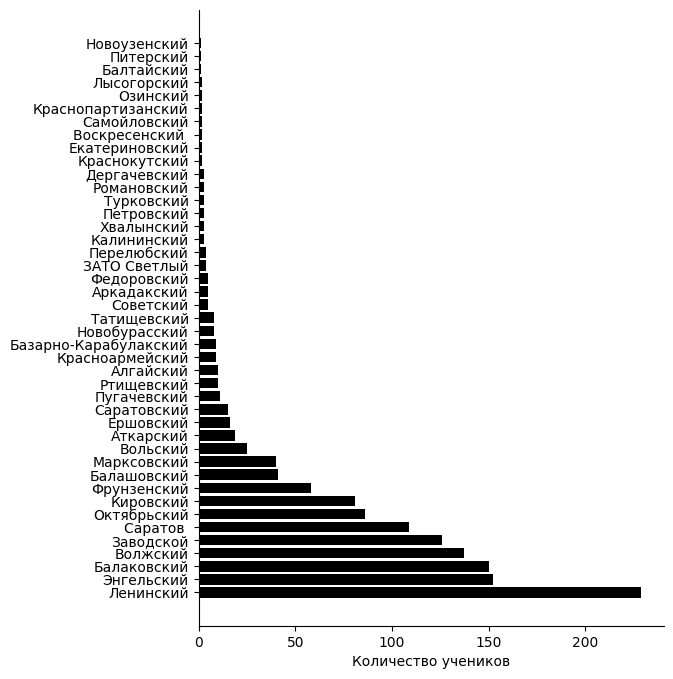

In [ ]:
"""
Записи группируются по признаку area_name таким образом,
что создаётся новый объект Series, индексами которого
являются названия районов, а значениями количества учеников.
"""
ege_an = ege.groupby('area_name').size()

""" Районы сортируются по убыванию количества учеников. """
ege_an = ege_an.sort_values(ascending=False)

""" Задаётся размер диаграммы. """
plt.figure(figsize=(6, 8))

"""
Создаётся гистограмма функцией barh библиотеки Matplotlib.
Функции передаются три агрумента: названия районов (подписи линий
гистограммы), количества учеников (длина линий) и цвет линий.
"""
plt.barh(
    ege_an.index,
    ege_an.values,
    color='black'
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Количество учеников')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## Распределение результатов по видам школ

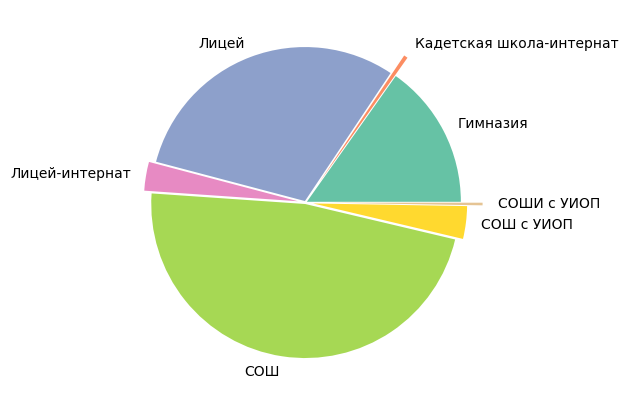

In [ ]:
"""
Записи группируются по признаку school_type таким образом,
что создаётся новый объект Series, индексами которого
являются виды школ, а значениями количества учеников.
"""
ege_st = ege.groupby('school_type').size()

""" Длинные названия сокращаются. """
ege_st = ege_st.rename({
    ege_st.index[4]: 'СОШ',
    ege_st.index[5]: 'СОШ с УИОП',
    ege_st.index[6]: 'СОШИ с УИОП'
})

""" Задаётся размер диаграммы. """
plt.figure(figsize=(5, 5))

"""
Создаётся круговая диаграмма функцией pie библиотеки Matplotlib.

Функции передаётся единственный позиционный аргумент - значения,
на основании которых будут построены клины круговой диаграммы,
а именно количества учеников для каждого вида школ.

Функции передаются следующие именнованные аргументы:
- explode: список вещественных чисел, задающий смещение каждого
клина относительно центра диаграммы;
- labels: подписи рядом с клинами диаграммы, а именно виды школ;
- colors: цветовая палитра, задающаяся функцией библиотеки Seaborn.
"""
plt.pie(
    ege_st.values,
    explode=([0.01, 0.15, 0.01, 0.05, 0.01, 0.05, 0.15]),
    labels=ege_st.index,
    colors=sns.color_palette('Set2')
)

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## Распределение результатов по первичному баллу

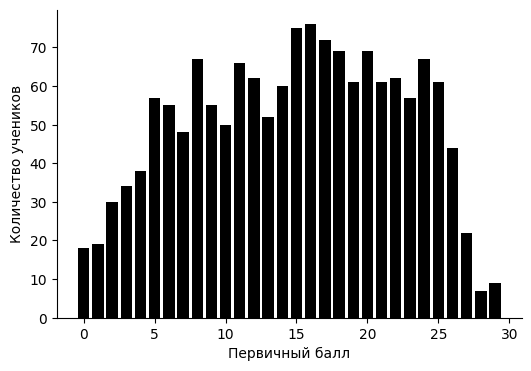

In [ ]:
"""
Записи группируются по признаку primary_score таким образом,
что создаётся новый объект Series, индексами которого
являются первичные баллы, а значениями количества учеников.
"""
ege_ps = ege.groupby('primary_score').size()

""" Задаётся размер диаграммы. """
plt.figure(figsize=(6, 4))

"""
Создаётся гистограмма функцией bar библиотеки Matplotlib.
Функции передаются три агрумента: первичные баллы, служащие
подписями столбцов гистограммы, количества учеников, задающие
высоту столбцов гистограммы, и цвет линий.
"""
plt.bar(
    ege_ps.index,
    ege_ps.values,
    color='black'
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Первичный балл')

""" Добавляется подпись вертикальной оси гистограммы. """
plt.ylabel('Количество учеников')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## Распределение результатов по первому заданию

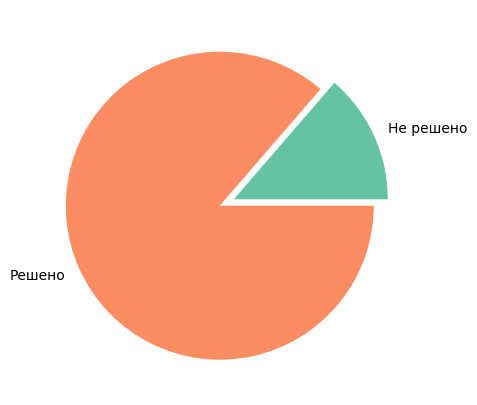

In [13]:
"""
Записи группируются по признаку task_1 таким образом,
что создаётся новый объект Series, индексами которого
являются ноль и единица, а значениями количества учеников.
"""
ege_t1 = ege.groupby('task_1').size()

""" Ноль и единица переименуются для наглядности. """
ege_t1 = ege_t1.rename({0: 'Не решено', 1: 'Решено'})

""" Задаётся размер диаграммы. """
plt.figure(figsize=(5, 5))

"""
Создаётся круговая диаграмма функцией pie библиотеки Matplotlib.

Функции передаётся единственный позиционный аргумент - значения,
на основании которых будут построены клины круговой диаграммы,
а именно количества учеников решивших и нерешивших задание.

Функции передаются следующие именнованные аргументы:
- explode: список вещественных чисел, задающий смещение каждого
клина относительно центра диаграммы;
- labels: подписи рядом с клинами диаграммы;
- colors: цветовая палитра, задающаяся функцией библиотеки Seaborn.
"""
plt.pie(
    ege_t1.values,
    explode=([0.05, 0.05]),
    labels=ege_t1.index,
    colors=sns.color_palette('Set2')
)

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

# Обобщение результатов по некоторым признакам

## Лучшие результаты ОГЭ по районам

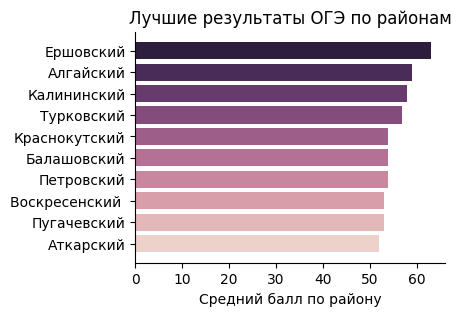

In [ ]:
"""
Фильтруются записи, в которых расстояние от Саратова больше ноля,
то есть фильтруются все ученики не из города.
Записи группируются по признаку area_name таким образом,
что создаётся новый объект Series, индексами которого
являются названия районов, а значениями количества учеников.
"""
oge_an_out = oge[oge.distance > 0].groupby('area_name').size()

"""
Фильтруются записи учеников не из города,
притом из районов, где экзамен сдавали больше 10 человек.
"""
oge_an_over10 = oge[
    oge.area_name.isin(oge_an_out[oge_an_out > 10].index)
]

"""
Записи признаков area_name и secondary_score группируются
по названиям районов, столбец secondary_score теперь содержит
средний вторичный балл для каждого района. Полученный DataFrame
транспонируется и сжимается, преобразовываясь в объект Series,
индексами которого являются названия районов, а значениями
средний вторичный балл всех учеников для каждого района.
"""
oge_an_mean = oge_an_over10[
    ['area_name', 'secondary_score']
].groupby('area_name').mean().T.squeeze()

""" Средние баллы округляются до целых чисел. """
oge_an_mean = oge_an_mean.astype(int)

""" Районы сортируются по возрастанию среднего балла. """
oge_an_mean = oge_an_mean.sort_values()

""" Все районы, невошедшие в десятку лучших, отбрасываются. """
oge_an_mean = oge_an_mean.iloc[-10:]

""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 3))

"""
Создаётся гистограмма функцией barh библиотеки Matplotlib.

Функции передаются следующие агрументы:
- названия районов, служащие подписями линий гистограммы;
- средние баллы учеников, задающие длину линий гистограммы;
- цветовая палитра, задающаяся функцией библиотеки Seaborn.
"""
plt.barh(
    oge_an_mean.index,
    oge_an_mean.values,
    color=sns.cubehelix_palette(n_colors=10)
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Средний балл по району')

""" Добавляется название гистограммы. """
plt.title('Лучшие результаты ОГЭ по районам')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## Лучшие результаты ЕГЭ по районам

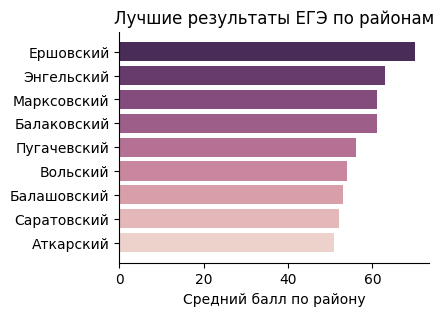

In [ ]:
"""
Фильтруются записи, в которых расстояние от Саратова больше ноля,
то есть фильтруются все ученики не из города.
Записи группируются по признаку area_name таким образом,
что создаётся новый объект Series, индексами которого
являются названия районов, а значениями количества учеников.
"""
ege_an_out = ege[ege.distance > 0].groupby('area_name').size()

"""
Фильтруются записи учеников не из города,
притом из районов, где экзамен сдавали больше 10 человек.
"""
ege_an_over10 = ege[
    ege.area_name.isin(ege_an_out[ege_an_out > 10].index)
]

"""
Записи признаков area_name и secondary_score группируются
по названиям районов, столбец secondary_score теперь содержит
средний вторичный балл для каждого района. Полученный DataFrame
транспонируется и сжимается, преобразовываясь в объект Series,
индексами которого являются названия районов, а значениями
средний вторичный балл всех учеников для каждого района.
"""
ege_an_mean = ege_an_over10[
    ['area_name', 'secondary_score']
].groupby('area_name').mean().T.squeeze()

""" Средние баллы округляются до целых чисел. """
ege_an_mean = ege_an_mean.astype(int)

""" Районы сортируются по возрастанию среднего балла. """
ege_an_mean = ege_an_mean.sort_values()

""" Все районы, невошедшие в десятку лучших, отбрасываются. """
ege_an_mean = ege_an_mean.iloc[-10:]

""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 3))

"""
Создаётся гистограмма функцией barh библиотеки Matplotlib.

Функции передаются следующие агрументы:
- названия районов, служащие подписями линий гистограммы;
- средние баллы учеников, задающие длину линий гистограммы;
- цветовая палитра, задающаяся функцией библиотеки Seaborn.
"""
plt.barh(
    ege_an_mean.index,
    ege_an_mean.values,
    color=sns.cubehelix_palette(n_colors=10)
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Средний балл по району')

""" Добавляется название гистограммы. """
plt.title('Лучшие результаты ЕГЭ по районам')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## Лучшие результаты ОГЭ по школам

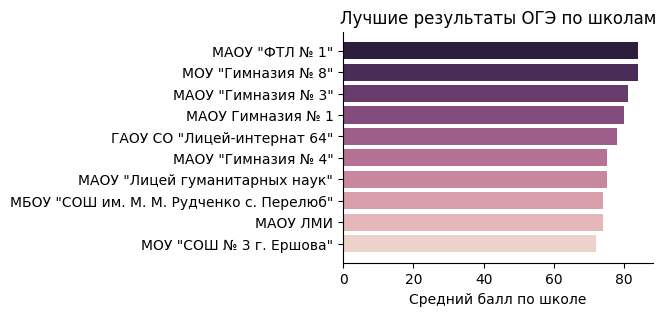

In [ ]:
"""
Записи группируются по признаку school_name таким образом,
что создаётся новый объект Series, индексами которого
являются названия школ, а значениями количества учеников.
"""
oge_sn = oge.groupby('school_name').size()

"""
Фильтруются записи учеников из школ,
в которых экзамен сдавали больше 10 человек.
"""
oge_sn_over10 = oge[
    oge.school_name.isin(oge_sn[oge_sn > 10].index)
]

"""
Записи признаков school_name и secondary_score группируются
по названиям школ, столбец secondary_score теперь содержит
средний вторичный балл для каждой школы. Полученный DataFrame
транспонируется и сжимается, преобразовываясь в объект Series,
индексами которого являются названия школ, а значениями
средний вторичный балл всех учеников для каждой школы.
"""
oge_sn_mean = oge_sn_over10[
    ['school_name', 'secondary_score']
].groupby('school_name').mean().T.squeeze()

""" Средние баллы округляются до целых чисел. """
oge_sn_mean = oge_sn_mean.astype(int)

""" Школы сортируются по возрастанию среднего балла. """
oge_sn_mean = oge_sn_mean.sort_values()

""" Все школы, невошедшие в десятку лучших, отбрасываются. """
oge_sn_mean = oge_sn_mean.iloc[-10:]

""" Длинное название школы сокращается. """
oge_sn_mean = oge_sn_mean.rename({
    oge_sn_mean.index[0]: 'МОУ "СОШ № 3 г. Ершова"'
})

""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 3))

"""
Создаётся гистограмма функцией barh библиотеки Matplotlib.

Функции передаются следующие агрументы:
- названия школ, служащие подписями линий гистограммы;
- средние баллы учеников, задающие длину линий гистограммы;
- цветовая палитра, задающаяся функцией библиотеки Seaborn.
"""
plt.barh(
    oge_sn_mean.index,
    oge_sn_mean.values,
    color=sns.cubehelix_palette(n_colors=10)
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Средний балл по школе')

""" Добавляется название гистограммы. """
plt.title('Лучшие результаты ОГЭ по школам')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## Лучшие результаты ЕГЭ по школам

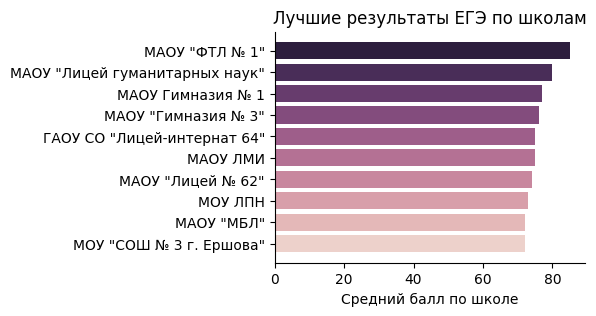

In [ ]:
"""
Записи группируются по признаку school_name таким образом,
что создаётся новый объект Series, индексами которого
являются названия школ, а значениями количества учеников.
"""
ege_sn = ege.groupby('school_name').size()

"""
Фильтруются записи учеников из школ,
в которых экзамен сдавали больше 10 человек.
"""
ege_sn_over10 = ege[
    ege.school_name.isin(ege_sn[ege_sn > 10].index)
]

"""
Записи признаков school_name и secondary_score группируются
по названиям школ, столбец secondary_score теперь содержит
средний вторичный балл для каждой школы. Полученный DataFrame
транспонируется и сжимается, преобразовываясь в объект Series,
индексами которого являются названия школ, а значениями
средний вторичный балл всех учеников для каждой школы.
"""
ege_sn_mean = ege_sn_over10[
    ['school_name', 'secondary_score']
].groupby('school_name').mean().T.squeeze()

""" Средние баллы округляются до целых чисел. """
ege_sn_mean = ege_sn_mean.astype(int)

""" Школы сортируются по возрастанию среднего балла. """
ege_sn_mean = ege_sn_mean.sort_values()

""" Все школы, невошедшие в десятку лучших, отбрасываются. """
ege_sn_mean = ege_sn_mean.iloc[-10:]

""" Длинное название школы сокращается. """
ege_sn_mean = ege_sn_mean.rename({
    ege_sn_mean.index[0]: 'МОУ "СОШ № 3 г. Ершова"'
})

""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 3))

"""
Создаётся гистограмма функцией barh библиотеки Matplotlib.

Функции передаются следующие агрументы:
- названия школ, служащие подписями линий гистограммы;
- средние баллы учеников, задающие длину линий гистограммы;
- цветовая палитра, задающаяся функцией библиотеки Seaborn.
"""
plt.barh(
    ege_sn_mean.index,
    ege_sn_mean.values,
    color=sns.cubehelix_palette(n_colors=10)
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси гистограммы. """
plt.xlabel('Средний балл по школе')

""" Добавляется название гистограммы. """
plt.title('Лучшие результаты ЕГЭ по школам')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

# Гипотезы

## Чем дальше от Саратова, тем хуже результаты ОГЭ

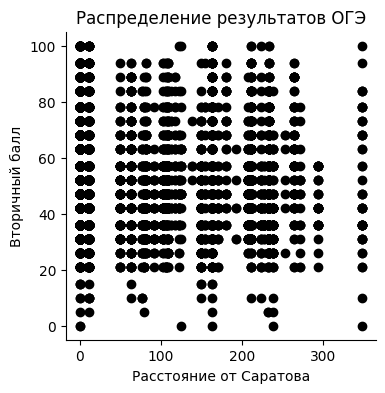

In [ ]:
""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 4))

"""
Создаётся точечная диаграмма функцией scatter библиотеки Matplotlib.
Функции передаются три агрумента: абсциссы, ординаты и цвет точек.
"""
plt.scatter(
    oge.distance,
    oge.secondary_score,
    color='black'
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси диаграммы. """
plt.xlabel('Расстояние от Саратова')

""" Добавляется подпись вертикальной оси диаграммы. """
plt.ylabel('Вторичный балл')

""" Добавляется название диаграммы. """
plt.title('Распределение результатов ОГЭ')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## Чем дальше от Саратова, тем хуже результаты ЕГЭ

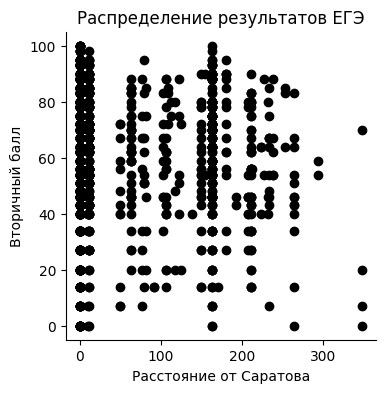

In [ ]:
""" Задаётся размер диаграммы. """
plt.figure(figsize=(4, 4))

"""
Создаётся точечная диаграмма функцией scatter библиотеки Matplotlib.
Функции передаются три агрумента: абсциссы, ординаты и цвет точек.
"""
plt.scatter(
    ege.distance,
    ege.secondary_score,
    color='black'
)

""" Скрываются верхняя и правая полоски сетки. """
plt.gca().spines[['top', 'right',]].set_visible(False)

""" Добавляется подпись горизонтальной оси диаграммы. """
plt.xlabel('Расстояние от Саратова')

""" Добавляется подпись вертикальной оси диаграммы. """
plt.ylabel('Вторичный балл')

""" Добавляется название диаграммы. """
plt.title('Распределение результатов ЕГЭ')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## В лицеях результаты ОГЭ лучше, чем в СОШ

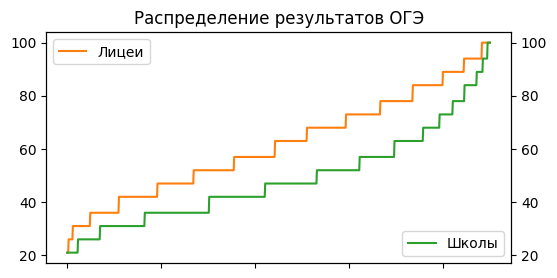

In [ ]:
"""
Фильтруются записи учеников, учащихся в лицеях,
и сохраняются в новый DataFrame.
"""
oge_lyc = oge[oge.school_type == 'Лицей']

"""
Фильтруются записи учеников с вторичным баллом больше 20
и сохраняются первые 900 записей, чтобы нивелировать разность
в количестве учеников из лицеев и из СОШ.
"""
oge_lyc = oge_lyc[oge_lyc.secondary_score > 20].iloc[:900]

""" Ученики сортируются по возрастанию вторичного балла. """
oge_lyc = oge_lyc.sort_values('secondary_score')

"""
Восстанавливается индексация, изменяющаяся после сортировки.
В ином случае график не будет правильно отображаться, так как
важно и возрастание вторичного балла, и индексов учеников.
"""
oge_lyc = oge_lyc.reset_index()

"""
Фильтруются записи учеников, учащихся в СОШ,
и сохраняются в новый DataFrame.
"""
oge_sch = oge[oge.school_type == 'Средняя общеобразовательная школа']

"""
Фильтруются записи учеников с вторичным баллом больше 20
и сохраняются первые 900 записей, чтобы нивелировать разность
в количестве учеников из лицеев и из СОШ.
"""
oge_sch = oge_sch[oge_sch.secondary_score > 20].iloc[:900]

""" Ученики сортируются по возрастанию вторичного балла. """
oge_sch = oge_sch.sort_values('secondary_score')

"""
Восстанавливается индексация, изменяющаяся после сортировки.
В ином случае график не будет правильно отображаться, так как
важно и возрастание вторичного балла, и индексов учеников.
"""
oge_sch = oge_sch.reset_index()

"""
Функцией subplots библиотеки Matplotlib создаётся система координат,
поддерживающая несколько графиков, и сохраняется в axis1.
"""
_, axis1 = plt.subplots(figsize=(6, 3))

""" Созданная ранее система координат дублируется в axis2. """
axis2 = axis1.twinx()

"""
В axis1 строится график возрастания вторичного балла по лицеям,
которому задаются цвет и подпись.
"""
axis1.plot(oge_lyc.secondary_score, color='C1', label='Лицеи')

"""
В axis2 строится график возрастания вторичного балла по СОШ,
которому задаются цвет и подпись.
"""
axis2.plot(oge_sch.secondary_score, color='C2', label='Школы')

""" Легенда графика балла лицеев помещается в верхний левый угол. """
axis1.legend(loc=2)

""" Легенда графика балла СОШ помещается в нижний правый угол. """
axis2.legend(loc=4)

""" Подписи горизонтальной оси скрываются за ненадобностью. """
axis1.set_xticklabels([])

""" Добавляется название системы координат. """
plt.title('Распределение результатов ОГЭ')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()

## В лицеях результаты ЕГЭ лучше, чем в СОШ

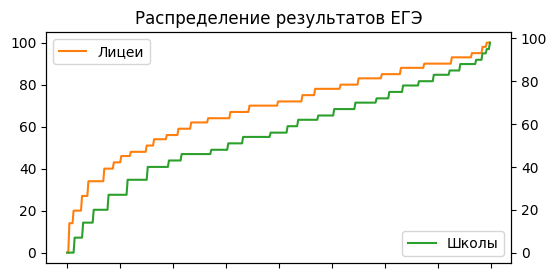

In [ ]:
"""
Фильтруются записи учеников, учащихся в лицеях,
и сохраняются в новый DataFrame.
"""
ege_lyc = ege[ege.school_type == 'Лицей']

"""
Cохраняются первые 400 записей, чтобы нивелировать разность
в количестве учеников из лицеев и из СОШ.
"""
ege_lyc = ege_lyc.iloc[:400]

""" Ученики сортируются по возрастанию вторичного балла. """
ege_lyc = ege_lyc.sort_values('secondary_score')

"""
Восстанавливается индексация, изменяющаяся после сортировки.
В ином случае график не будет правильно отображаться, так как
важно и возрастание вторичного балла, и индексов учеников.
"""
ege_lyc = ege_lyc.reset_index()

"""
Фильтруются записи учеников, учащихся в СОШ,
и сохраняются в новый DataFrame.
"""
ege_sch = ege[ege.school_type == 'Средняя общеобразовательная школа']

"""
Cохраняются первые 400 записей, чтобы нивелировать разность
в количестве учеников из лицеев и из СОШ.
"""
ege_sch = ege_sch.iloc[:400]

""" Ученики сортируются по возрастанию вторичного балла. """
ege_sch = ege_sch.sort_values('secondary_score')

"""
Восстанавливается индексация, изменяющаяся после сортировки.
В ином случае график не будет правильно отображаться, так как
важно и возрастание вторичного балла, и индексов учеников.
"""
ege_sch = ege_sch.reset_index()

"""
Функцией subplots библиотеки Matplotlib создаётся система координат,
поддерживающая несколько графиков, и сохраняется в axis1.
"""
_, axis1 = plt.subplots(figsize=(6, 3))

""" Созданная ранее система координат дублируется в axis2. """
axis2 = axis1.twinx()

"""
В axis1 строится график возрастания вторичного балла по лицеям,
которому задаются цвет и подпись.
"""
axis1.plot(ege_lyc.secondary_score, color='C1', label='Лицеи')

"""
В axis2 строится график возрастания вторичного балла по СОШ,
которому задаются цвет и подпись.
"""
axis2.plot(ege_sch.secondary_score, color='C2', label='Школы')

""" Легенда графика балла лицеев помещается в верхний левый угол. """
axis1.legend(loc=2)

""" Легенда графика балла СОШ помещается в нижний правый угол. """
axis2.legend(loc=4)

""" Подписи горизонтальной оси скрываются за ненадобностью. """
axis1.set_xticklabels([])

""" Добавляется название системы координат. """
plt.title('Распределение результатов ЕГЭ')

""" Отображаются созданные ранее фигуры библиотеки Matplotlib. """
plt.show()